<a href="https://colab.research.google.com/github/AndreHucke/gen_ai/blob/main/Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----
# Turn on the GPU:

Runtime -> Change runtime type > Select GPU. Options: <select>
  <option value="cpu">CPU</option>
  <option value="t4" selected>T4 GPU</option>
  <option value="l4">L4 GPU</option>
  <option value="a100">A100 GPU</option>
  <option value="h100">H100 GPU</option>
</select>

I've selected the T4 because it is the lower end of GPU. I don't think I'll need the extra speed/RAM of the other GPUs offered

The GPUs are great at parallelized computation, so it speeds up the training by a lot.

----

In [2]:
import kagglehub
import os
import shutil

# Download the dataset
path = kagglehub.dataset_download("ipythonx/mvtec-ad")
print("Path to dataset files:", path)

# Good examples:
# transistor/train/good/
transistor_good_path = os.path.join(path, 'transistor', 'train', 'good')

Using Colab cache for faster access to the 'mvtec-ad' dataset.
Path to dataset files: /kaggle/input/mvtec-ad


In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Define your destination in Drive
drive_dest = '/content/drive/MyDrive/transistor_good_examples'
os.makedirs(drive_dest, exist_ok=True)

# Copy the files from the temporary Colab storage to your Drive
for file_name in os.listdir(transistor_good_path):
    source = os.path.join(transistor_good_path, file_name)
    destination = os.path.join(drive_dest, file_name)
    shutil.copy(source, destination)

print(f"Successfully uploaded files to: {drive_dest}")

Mounted at /content/drive
Successfully uploaded files to: /content/drive/MyDrive/transistor_good_examples


In [5]:
import pandas as pd

# List all files in the Drive directory
file_names = os.listdir(drive_dest)
# Create full paths
full_paths = [os.path.join(drive_dest, f) for f in file_names]

# Create the Dataframe
df = pd.DataFrame({
    'file_name': file_names,
    'path': full_paths
})

# Display the df
df

file_name                                               path
0     173.png  /content/drive/MyDrive/transistor_good_example...
1     043.png  /content/drive/MyDrive/transistor_good_example...
2     038.png  /content/drive/MyDrive/transistor_good_example...
3     069.png  /content/drive/MyDrive/transistor_good_example...
4     083.png  /content/drive/MyDrive/transistor_good_example...
..        ...                                                ...
208   008.png  /content/drive/MyDrive/transistor_good_example...
209   006.png  /content/drive/MyDrive/transistor_good_example...
210   058.png  /content/drive/MyDrive/transistor_good_example...
211   175.png  /content/drive/MyDrive/transistor_good_example...
212   014.png  /content/drive/MyDrive/transistor_good_example...

[213 rows x 2 columns]

In [11]:
import psutil

# Get memory statistics
memory = psutil.virtual_memory()
total_ram = memory.total / (1024**3)  # Convert to GB
available_ram = memory.available / (1024**3)

print(f"Total RAM: {total_ram:.2f} GB")
print(f"Available RAM: {available_ram:.2f} GB")

Total RAM: 12.67 GB
Available RAM: 11.10 GB


In [8]:
from PIL import Image
import numpy as np

def get_image_metadata(path):
    with Image.open(path) as img:
        width, height = img.size
        # Channels: 'RGB' is 3, 'L' (grayscale) is 1, 'RGBA' is 4
        channels = len(img.getbands())
        # Data type (most MVTec images are uint8)
        dtype = str(np.array(img).dtype)
    return height, width, channels, dtype

# Apply the function to the existing dataframe 'df'
# This creates a tuple of metadata for each row
metadata = df['path'].apply(get_image_metadata)

# Unpack the tuples into separate columns
df[['height', 'width', 'channels', 'dtype']] = pd.DataFrame(metadata.tolist(), index=df.index)

# Display updated dataframe
df

file_name                                               path  height  \
0     173.png  /content/drive/MyDrive/transistor_good_example...    1024   
1     043.png  /content/drive/MyDrive/transistor_good_example...    1024   
2     038.png  /content/drive/MyDrive/transistor_good_example...    1024   
3     069.png  /content/drive/MyDrive/transistor_good_example...    1024   
4     083.png  /content/drive/MyDrive/transistor_good_example...    1024   
..        ...                                                ...     ...   
208   008.png  /content/drive/MyDrive/transistor_good_example...    1024   
209   006.png  /content/drive/MyDrive/transistor_good_example...    1024   
210   058.png  /content/drive/MyDrive/transistor_good_example...    1024   
211   175.png  /content/drive/MyDrive/transistor_good_example...    1024   
212   014.png  /content/drive/MyDrive/transistor_good_example...    1024   

     width  channels  dtype  
0     1024         3  uint8  
1     1024         3  uint8  
2     1024         3  uint8  
3     1024         3  uint8  
4     1024         3  uint8  
..     ...       ...    ...  
208   1024         3  uint8  
209   1024         3  uint8  
210   1024         3  uint8  
211   1024         3  uint8  
212   1024         3  uint8  

[213 rows x 6 columns]

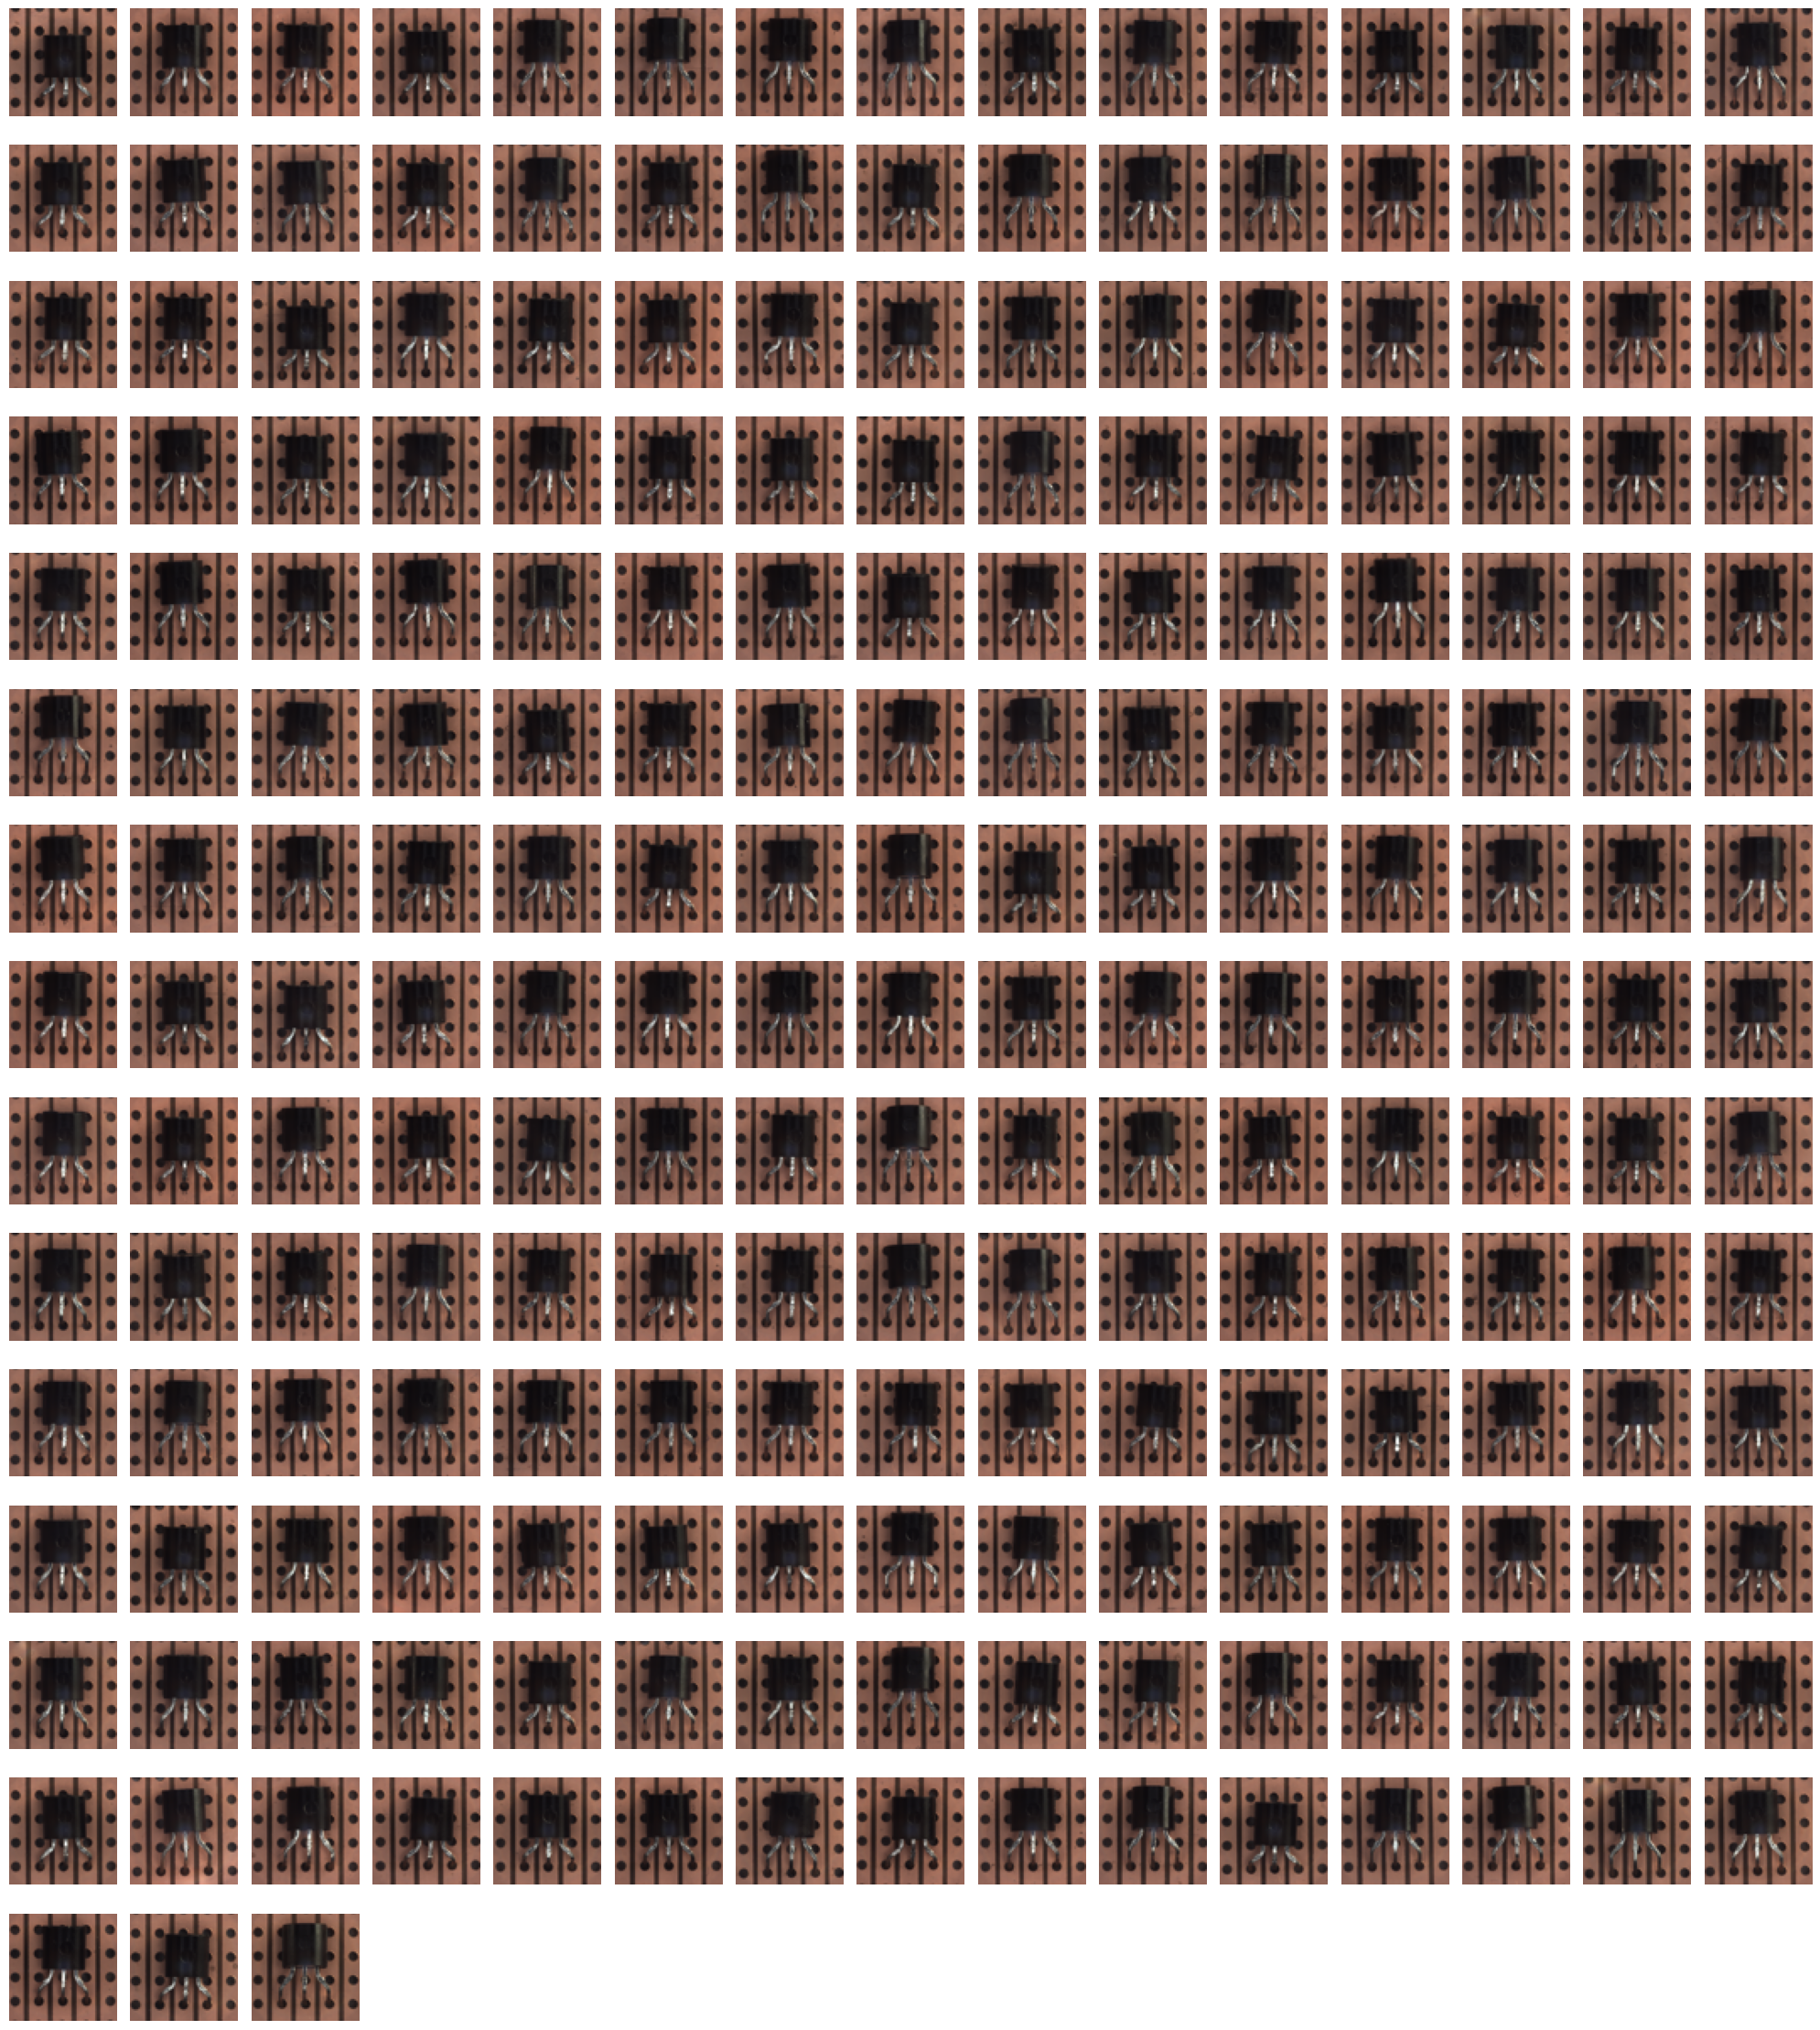

In [10]:
import matplotlib.pyplot as plt
import math
from PIL import Image

def visualize_all_images(df, thumb_size=(64, 64)):
    paths = df['path'].tolist()
    num_images = len(paths)

    # Calculate grid dimensions (approx square)
    cols = 15  # Fixed columns for readability
    rows = math.ceil(num_images / cols)

    plt.figure(figsize=(20, rows * 1.5)) # Adjust height based on rows

    for i, img_path in enumerate(paths):
        # Open and resize for display only (saves display memory)
        with Image.open(img_path) as img:
            img_thumb = img.resize(thumb_size)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img_thumb)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Run the visualization
visualize_all_images(df)